# Import libs

In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from time import time
import random
np.random.seed(8675309)
random.seed(8675309)

# Data Exploration

The data files is given by TRUMPF. The problem is to predict if the part which is cut by a laser machine can be removed from the machine successfully or not. In general, after cutting small pins will push the part out of the original plate. However, the layout of pins need to be adjusted to ensure the part extraction every time the geometry changes. Therefore, this project is to create a prediction model to predict the successful rate of the part extraction for each configuration.

The columns include geometry, number of position and pins, material properties, and cutting technology.

In [2]:
# readfile
df = pd.read_csv('TRUMPF_TruLaserCenter_Dataset_2018.csv')
df.head()

,DataID,id_00002_name_lst,id_00003_name_teil,id_00004_maschinennummer,id_00005_entnum,id_00006_framework_version,id_01001_density,id_01002_thickness,id_01003_emodul,id_01004_cut_tech,...,id_03058_l_BBT_PH_y,id_03059_D_Pin_Amin,id_03060_D_Pin_Amax,id_03061_D_Pin_Umin,id_03062_D_Pin_Umax,id_03063_B_N_E1,id_13001_date,id_13002_valid,id_13007_poti,id_13008_RGT_erfolgreich_1try
0,A0280E000618082200003,20180822_10_40_34_497_741494V2_1.LST,P1026,A0280E0006,1,V3-3,0.000008,1.5,200000,N2,...,6.473,1.323466,3.572008,0.388193,0.708874,0,22.08.2018 07:27:25:546,2,100,0
1,A0280E000618082200006,20180822_10_40_34_497_741494V2_1.LST,P1026,A0280E0006,2,V3-3,0.000008,1.5,200000,N2,...,6.473,1.323466,3.572008,0.388193,0.708874,0,22.08.2018 07:29:07:122,2,100,0
2,A0280E000618082200007,20180822_10_40_34_497_741494V2_1.LST,P1026,A0280E0006,2,V3-3,0.000008,1.5,200000,N2,...,6.473,1.323466,3.572008,0.388193,0.708874,0,22.08.2018 08:28:19:604,2,100,0
3,A0280E000618082200010,20180822_10_40_34_497_741494V2_1.LST,P1026,A0280E0006,4,V3-3,0.000008,1.5,200000,N2,...,6.477,1.323466,3.572008,0.388193,0.708874,0,22.08.2018 08:31:13:224,2,100,1
4,A0280E000618082200011,20180822_10_40_34_497_741494V2_1.LST,P1026,A0280E0006,4,V3-3,0.000008,1.5,200000,N2,...,6.477,1.323466,3.572008,0.388193,0.708874,0,22.08.2018 08:31:52:804,2,100,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121085 entries, 0 to 121084
Data columns (total 100 columns):
DataID                           121085 non-null object
id_00002_name_lst                121085 non-null object
id_00003_name_teil               121085 non-null object
id_00004_maschinennummer         121085 non-null object
id_00005_entnum                  121085 non-null int64
id_00006_framework_version       121085 non-null object
id_01001_density                 121085 non-null float64
id_01002_thickness               121085 non-null float64
id_01003_emodul                  121085 non-null int64
id_01004_cut_tech                120260 non-null object
id_01005_b_spalt                 121085 non-null float64
id_01006_zerschneidung_tafel     121085 non-null float64
id_01007_k_flex_s1               121085 non-null float64
id_01008_k_flex_s2               121085 non-null float64
id_01009_k_flex_s3               121085 non-null float64
id_02001_area                    121085 non

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id_00005_entnum,121085.0,75.702465,88.312348,1.000000,17.000000,47.000000,104.000000,1.029000e+03
id_01001_density,121085.0,0.000007,0.000002,0.000003,0.000008,0.000008,0.000008,9.000000e-06
id_01002_thickness,121085.0,2.515898,1.256518,0.800000,1.500000,2.500000,3.000000,8.000000e+00
id_01003_emodul,121085.0,178671.594335,48142.139926,70000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05
id_01005_b_spalt,121085.0,0.250357,0.085772,0.060000,0.210000,0.230000,0.250000,7.000000e-01
id_01006_zerschneidung_tafel,121085.0,0.337518,0.131905,0.118206,0.247811,0.302491,0.423342,9.819040e-01
id_01007_k_flex_s1,121085.0,89665.722423,54318.469886,11666.666670,66666.666670,66666.666670,133333.333300,2.500000e+05
id_01008_k_flex_s2,121085.0,57127.750248,63524.246814,1944.444444,22222.222220,22222.222220,88888.888890,3.125000e+05
id_01009_k_flex_s3,121085.0,43677.034246,66819.904418,324.074074,7407.407407,7407.407407,59259.259260,3.906250e+05
id_02001_area,121085.0,60249.137738,103122.230417,-122297.570400,14091.677610,25097.819520,71148.650040,2.941785e+06


In [5]:
# There are -1 values which has no meaning, replace them as Nan
df = df.replace(-1, np.nan)
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105398 entries, 0 to 121084
Data columns (total 100 columns):
DataID                           105398 non-null object
id_00002_name_lst                105398 non-null object
id_00003_name_teil               105398 non-null object
id_00004_maschinennummer         105398 non-null object
id_00005_entnum                  105398 non-null int64
id_00006_framework_version       105398 non-null object
id_01001_density                 105398 non-null float64
id_01002_thickness               105398 non-null float64
id_01003_emodul                  105398 non-null int64
id_01004_cut_tech                105398 non-null object
id_01005_b_spalt                 105398 non-null float64
id_01006_zerschneidung_tafel     105398 non-null float64
id_01007_k_flex_s1               105398 non-null float64
id_01008_k_flex_s2               105398 non-null float64
id_01009_k_flex_s3               105398 non-null float64
id_02001_area                    105398 non

In [6]:
# drop unnecessary columns
# these columns are most date or id
drop_cols = ['DataID', 'id_00002_name_lst', 'id_13001_date' , 'id_00006_framework_version', 'id_00004_maschinennummer']
# id_00003_name_teil will be dropped later after aggregation
df = df.drop(columns=drop_cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105398 entries, 0 to 121084
Data columns (total 95 columns):
id_00003_name_teil               105398 non-null object
id_00005_entnum                  105398 non-null int64
id_01001_density                 105398 non-null float64
id_01002_thickness               105398 non-null float64
id_01003_emodul                  105398 non-null int64
id_01004_cut_tech                105398 non-null object
id_01005_b_spalt                 105398 non-null float64
id_01006_zerschneidung_tafel     105398 non-null float64
id_01007_k_flex_s1               105398 non-null float64
id_01008_k_flex_s2               105398 non-null float64
id_01009_k_flex_s3               105398 non-null float64
id_02001_area                    105398 non-null float64
id_02002_U_a                     105398 non-null float64
id_02003_volume                  105398 non-null float64
id_02004_f_mass                  105398 non-null float64
id_02005_zerschneidung_teil      105398 

In [7]:
# some categorical columns are int for now. transform to object type.
object_cols = ['id_01004_cut_tech', 'id_02014_anz_hs_simple', 'id_03006_Z_pushout_modus', 'id_03015_SA_inP', 'id_03016_SKT_inP', 'id_03041_pininline', 'id_03055_hs_gestuetzt', 'id_03063_B_N_E1', 'id_13002_valid', 'id_13007_poti']
df[object_cols] = df[object_cols].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105398 entries, 0 to 121084
Data columns (total 95 columns):
id_00003_name_teil               105398 non-null object
id_00005_entnum                  105398 non-null int64
id_01001_density                 105398 non-null float64
id_01002_thickness               105398 non-null float64
id_01003_emodul                  105398 non-null int64
id_01004_cut_tech                105398 non-null object
id_01005_b_spalt                 105398 non-null float64
id_01006_zerschneidung_tafel     105398 non-null float64
id_01007_k_flex_s1               105398 non-null float64
id_01008_k_flex_s2               105398 non-null float64
id_01009_k_flex_s3               105398 non-null float64
id_02001_area                    105398 non-null float64
id_02002_U_a                     105398 non-null float64
id_02003_volume                  105398 non-null float64
id_02004_f_mass                  105398 non-null float64
id_02005_zerschneidung_teil      105398 

In [8]:
# some numerical columns which are supposed to be float are int for now. transform int to float
df[df.select_dtypes(include='int').columns] = df[df.select_dtypes(include='int').columns].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105398 entries, 0 to 121084
Data columns (total 95 columns):
id_00003_name_teil               105398 non-null object
id_00005_entnum                  105398 non-null int64
id_01001_density                 105398 non-null float64
id_01002_thickness               105398 non-null float64
id_01003_emodul                  105398 non-null int64
id_01004_cut_tech                105398 non-null object
id_01005_b_spalt                 105398 non-null float64
id_01006_zerschneidung_tafel     105398 non-null float64
id_01007_k_flex_s1               105398 non-null float64
id_01008_k_flex_s2               105398 non-null float64
id_01009_k_flex_s3               105398 non-null float64
id_02001_area                    105398 non-null float64
id_02002_U_a                     105398 non-null float64
id_02003_volume                  105398 non-null float64
id_02004_f_mass                  105398 non-null float64
id_02005_zerschneidung_teil      105398 

In [9]:
# rename column "successful" to "label"
df = df.rename(columns={'id_13008_RGT_erfolgreich_1try':'label'})
df['label'] = df['label'].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105398 entries, 0 to 121084
Data columns (total 95 columns):
id_00003_name_teil              105398 non-null object
id_00005_entnum                 105398 non-null int64
id_01001_density                105398 non-null float64
id_01002_thickness              105398 non-null float64
id_01003_emodul                 105398 non-null int64
id_01004_cut_tech               105398 non-null object
id_01005_b_spalt                105398 non-null float64
id_01006_zerschneidung_tafel    105398 non-null float64
id_01007_k_flex_s1              105398 non-null float64
id_01008_k_flex_s2              105398 non-null float64
id_01009_k_flex_s3              105398 non-null float64
id_02001_area                   105398 non-null float64
id_02002_U_a                    105398 non-null float64
id_02003_volume                 105398 non-null float64
id_02004_f_mass                 105398 non-null float64
id_02005_zerschneidung_teil     105398 non-null float64

In [10]:
# save data to csv file after cleaning
#df.to_csv('processed.csv')

In [11]:
# splitting data by machine id
# information leakage between training and testing set prohibition is ensured
np.random.seed(84)
part_names = df['id_00003_name_teil'].unique()
print(len(part_names))
test_size = 0.2
test_size = int(test_size*len(part_names))
test_parts = np.random.choice(part_names, test_size )
test_loc = df['id_00003_name_teil'].isin(test_parts)
train_loc = ~df['id_00003_name_teil'].isin(test_parts)
df_test = df.loc[test_loc]
df_train = df.loc[train_loc]

df_train = df_train.drop(columns=['id_00003_name_teil'])
df_test = df_test.drop(columns=['id_00003_name_teil'])
df = df.drop(columns=['id_00003_name_teil'])
print('Test data shape', df_test.shape)
print('Train data shape', df_train.shape)

645
Test data shape (22395, 94)
Train data shape (83003, 94)


# Model

In this project, the selected prediction models are: Random Forest, XGBoost, and Artificial Neural Network

In [12]:
# for preprocessing
from sklearn import preprocessing

# for custom transformer
from sklearn.base import BaseEstimator, TransformerMixin

# for creating pipeline
from sklearn.pipeline import Pipeline, FeatureUnion

# for cross validation
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# for various metrics and reporting
from sklearn import metrics 
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
# feature selection
from sklearn.feature_selection import SelectFromModel

# xgboost library
from xgboost import XGBClassifier

# plot feature importance
from xgboost import plot_importance, plot_tree

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
def get_data_attrs_names(data):
    """
     get the categorical inputs and numerical inputs and output column names.
     We use the dtype of the data to decide between numerical and categorical attribut
     
     arguements:
     data -- pandas dataframe.
     
     return:
     a dict with the following keys and values
     y: list of of the target attribute
     X_cat: list of categorical inputs i.e dtype == object
     X_num: list of numerical inputs i.e dtype != object 
     X: list of the combied {X_num, X_cat} inputs
    """
        
    all_attribs = list(data.columns.values)
    target_attrib = ['label']
    if target_attrib[0] in all_attribs:
        # seperate out output column
        y = data[target_attrib]
        print("\n\nsample of 'target i.e output attributes'")
        print(y.head())

    data_cat = data.select_dtypes(include=['object']).copy()
    if target_attrib[0] in all_attribs:
        data_cat = data_cat.drop(target_attrib[0], axis=1)
    cat_attribs = list(data_cat.columns.values)
    print("\n\n'sample of categorical attribute and output attributes'")
    print(data_cat.head())

    # sep out continous aka scale columns
    data_scale = data.select_dtypes(include=[np.number]).copy()
    num_attribs = list(data_scale.columns.values)
    print("\n\n'sample of continous (scale) attributes'")
    print(data_scale.head())

    # col_X contains all the predictors
    X_attribs = list(all_attribs) # copy all cols names
    if target_attrib[0] in all_attribs:
        X_attribs.remove(target_attrib[0])

    res = {
        'y': target_attrib,
        'X_cat': cat_attribs,
        'X_num': num_attribs,
        'X': X_attribs
    }
    return res
    
attrs_map = get_data_attrs_names(df)   
print("\n\n names of the attributes splited according to type\n")
print(attrs_map)



sample of 'target i.e output attributes'
  label
0     0
1     0
2     0
3     1
4     1


'sample of categorical attribute and output attributes'
  id_01004_cut_tech id_02014_anz_hs_simple id_03006_Z_pushout_modus  \
0                N2                      2                        2   
1                N2                      2                        2   
2                N2                      2                        2   
3                N2                      2                        0   
4                N2                      2                        0   

  id_03015_SA_inP id_03016_SKT_inP id_03041_pininline id_03055_hs_gestuetzt  \
0               0                0                  1                     1   
1               0                0                  1                     1   
2               0                0                  1                     1   
3               0                0                  1                     1   
4               0            

In [14]:
# Just run this cell, or copy it to your code, do not try to understand it (yet).
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        """
        custom transformer to select the columns 
        arguements: 
        attribute_names -- name of the attributes to select
        """
        self.attribute_names = attribute_names
    
    def fit(self, X, y=None):
        """no processing to be done for fit"""
        return self
    
    def transform(self, X):
        """
        returns the subset of the columns corresponding to the attribute_names
        X -- input dataset
        return -- selected data columns from X
        """
        return X[self.attribute_names].values
    
class DataFrameCatImputer(BaseEstimator, TransformerMixin):
    def __init__(self):
        """
        custom categorical imputer
        source : https://stackoverflow.com/questions/25239958/impute-categorical-missing-values-in-scikit-learn
        Columns of dtype are imputed with the most frequest value in the column
        """
        pass
    
    def fit(self, X, y=None):
        for c in X:
            print("al", c)
            
        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)
        
        return self
    
    def transform(self, X):
        return X.fillna(self.fill)
# # # #
# # Categorical Encoder
# # # #
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out
# # # #
# # custom LabelEncoder as the org doesn't work
# # # #
class MyLabelEncoder(preprocessing.LabelEncoder):
    """
     custom LabelEncoder as the org doesn't work with the pipeline
    """
    def fit_transform(self, X, y=None):
        return super(MyLabelEncoder, self).fit_transform(X)
    
    def fit(self, X, y=None):
        return super(MyLabelEncoder, self).fit(X)
    
    def transform(self, X):
        return super(MyLabelEncoder, self).transform(X)
# # # #
# # create ML pipeline by:
# #  - Numerical attributes:
# #    + select numerical atttributes
# #    + impute missing values of features by median of the feature
# #    + scale values of feature by shifting it by its mean and dividing by std
# # - Categorical attributes:
# #    + select categorical attributes
# #    + for each column, perform one-hot encoding
# # - Feature union
# #    + combine the columns from numeric and categorical attributes to create the processed input dataset
def create_X_ml_pipeline(cat_attrs, num_attrs):
    """
    Create ml pipeline for the features by first processing numerical and then categorical attribute.
    Afterwards, it combines those to create final transformed X attribute.
    
    arguement:
    cat_attrs -- list of categorical attribute
    num_attrs -- list of numerical attribute
    
    return: a full X ML pipeline, which can be used for train and test data
    """
    
    num_pipeline = Pipeline([
       ('selector', DataFrameSelector(num_attrs)),
       ('imputer', preprocessing.Imputer(strategy="median")),
       ('std_scaler', preprocessing.StandardScaler()),
    ])

    cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attrs)),
        ('cat_enc', CategoricalEncoder(encoding="onehot-dense")),
    ])
    
    full_pipeline = FeatureUnion(transformer_list=[
        ('num_pipeline', num_pipeline),
        ('cat_pipeline', cat_pipeline),
    ])
    
    return full_pipeline
# # # #
# # The origical code use 'yes' and 'no' as labels. Therefore, they need to transform them into 1 and 0. Even though it's not for us but just keep it there. :)
def create_y_ml_pipeline(target_attr):
    """
    create ml pipeline for the output feature i.e target attribute by first selecting it and mapping 'no' and 'yes' to
    0 and 1
    arguements:
    target_attr -- list of outputs.(Usually a list containing one value)
    return:
    a full y ML pipeline, which can be used for train and test data
    """
    target_pipeline = Pipeline([
        ('selector', DataFrameSelector(target_attr)),
        #('cat_imputer', DataFrameCatImputer()),
        ('label_enc', MyLabelEncoder()),
    ])
    
    return target_pipeline


In [15]:
## run the pipeline for train data

X_pipeline = create_X_ml_pipeline(attrs_map['X_cat'], attrs_map['X_num'])
X_pipeline = X_pipeline.fit(df)
X = X_pipeline.transform(df)
X_train = X[train_loc, :]
X_test = X[test_loc, :]

print("\n\nShape of the transformed data. Note that increased in the number of columns due to one hot encoding\n")
print("\nOriginal data shape (num_rows, num_cols) == ")
print(df_train.shape)
print("\nTransformed data shape (num_rows, num_cols) == ")
print(X_train.shape)
print("\n\n Sample of transformed inputs\n", X_train, "\n")



Shape of the transformed data. Note that increased in the number of columns due to one hot encoding


Original data shape (num_rows, num_cols) == 
(83003, 94)

Transformed data shape (num_rows, num_cols) == 
(83003, 162)


 Sample of transformed inputs
 [[-0.89161503  0.45032655 -0.86602745 ...  0.          0.
   1.        ]
 [-0.88068892  0.45032655 -0.86602745 ...  0.          0.
   1.        ]
 [-0.88068892  0.45032655 -0.86602745 ...  0.          0.
   1.        ]
 ...
 [-0.22512258  0.45032655 -0.86602745 ...  0.          0.
   1.        ]
 [-0.20327037  0.45032655 -0.86602745 ...  0.          0.
   1.        ]
 [-0.18141816  0.45032655 -0.86602745 ...  0.          0.
   1.        ]] 



In [16]:

print("Output attribute name = ", attrs_map['y'], "\n")

y_pipeline = create_y_ml_pipeline(attrs_map['y'])
y_pipeline = y_pipeline.fit(df)
y = y_pipeline.transform(df)
y_train = y[train_loc]
y_test = y[test_loc]


print("\nSample of original output = ", df_train['label'].as_matrix().reshape(-1)[:20], "\n")
print("\nSample of transformed output = ", y_train[:20], "\n")

Output attribute name =  ['label'] 


Sample of original output =  [0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] 


Sample of transformed output =  [0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] 



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


# Model with XGBoost

In [17]:

def create_xgb_clf(clf_param=None):
    
    """
    create the xgboost classifier with predefined parameters, user can overwright it by passing kw args
    """
   
    param = {}
    # select the type of model to run at each iternation we have the options of tree and linear models
    ##param['booster'] = 'gbtree'
    
    # since we want the output to have the probability also, we will use the logistic objective.
    ##param['objective'] = 'binary:logistic'
    
    # lets use the error as the eval metrics i.e in each boosting steps we will reduce error
    param["eval_metric"] = "auc"
    
    # eta is like learning rate and it makes the model more robust by shrinking the weights at each iter
    ##param['eta'] = 0.3
    
    # gamma controls the minimum loss reduction to split and it should be tuned.
    param['gamma'] = 5

    # maximum depth of a tree to control the over fitting. should be tuned with cv
    ##param['max_depth'] = 10
    
    # minimum number of samples for the leaf and is used to control overfitting. We will use lower values, as we have
    # class imbalance and if we set high then accuracy of minory class will be affected
    ##param['min_child_weight']=1
    
    # maximum delta step from previous iteration for each tree. Higher the value (i.e non zero), more conservative we are
    param['max_delta_step'] = 0.7
    
    # as explained before in boosting each tree is build using samples from prev iteration with replace and this specify 
    # the fraction of data to be used for each tree. typically values slightly less than 1 makes it robust.
    param['subsample']= 0.5
    
    
    # as explained before boosting use subset of rows and also subset of columns. this controls the subset of cols as fraction
    ##param['colsample_bytree']=1
    
    # control the verbosity
    ##param['silent'] = 0
    
    # random seed for reproducibility
    ##param['seed'] = 0
    
    # set the initial prediction score i.e global bias 
    ##param['base_score'] = 0.5
    

    
    
    # how much weight to give the positive sample, in future we will change it but for now lets put it 1
    param['scale_pos_weight']= 1

    if clf_param:
        for k, v in clf_param.items():
            param[k] = clf_param[k]
            
    xgb_model = XGBClassifier(**param)
    return xgb_model




In [18]:
#plot the confusion matrix
def plot_cm(y_test_act, y_test_pred, title="Confusion Matrix", cmap="Blues"):
    """
    plot the confusion matrix given the test label and predicted label.
    
    @arguements:
    y_test_act -- actual label (0 or 1) of the data set.
    y_test_pred -- model's predicted label (o or 1) of the data set.
    title -- title string to be put on plot. default -- Confusion Matrix
    cmap -- matplotlib color palette to be used. default -- Blues
    """
    
    fig, ax = plt.subplots()
    cm = confusion_matrix(y_test_act, y_test_pred)
    tp = cm[1,1]
    tn = cm[0,0]
    fp = cm[0,1]
    fn = cm[1,0]
    sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, cmap = cmap, ax = ax)
    ax.set_title(title)
    ax.set_xlabel("Predicted class")
    ax.set_ylabel("Actual class")
    plt.show()
    
def plot_pr_roc(y_act, y_score, label = "", color='b', show=False, tag=""):
    """
    plot both precision recall and ROC curve 
    arguements:
    y_act -- Actual label of the class on the test data.
    y_score -- Actual probabilities as predicted by model on the test data.
    color (default:blue) -- color of plot
    show (default:False) -- flag to control whether to show plot or user will call plt.show() oneself.
    """
    fig = plt.figure(figsize=(20,10))
    ax1 = fig.add_subplot(1,2,1)
    ax1.set_xlim([-0.025,1.025])
    ax1.set_ylim([-0.025,1.025])
    ax1.set_xlabel('Recall')
    ax1.set_ylabel('Precision')
    ax1.set_title('PR Curve ' + tag)

    ax2 = fig.add_subplot(1,2,2)
    ax2.set_xlim([-0.025,1.025])
    ax2.set_ylim([-0.025,1.025])
    ax2.set_xlabel('False Positive Rate (FPR)')
    ax2.set_ylabel('True Positive Rate (TPR)')
    ax2.set_title('ROC Curve ' + tag)

    pr,rc,_ = precision_recall_curve(y_act, y_score)
    tpr,fpr,_ = roc_curve(y_act, y_score)
    
    ax1.plot(rc,pr,c=color,label=label)
    ax2.plot(tpr,fpr,c=color,label=label)
    ax2.plot([0,1], [0,1], 'k--')
    
    ax1.legend(loc='lower left')    
    ax2.legend(loc='lower left')
    
    if show:
        plt.show()

def plot_pr_vs_th(y_act, y_score, show=True, tag=""):
    """
    plot precision and recall vs threshold on same plot
    
    arguements: 
    y_act -- Actual label of the class on the test data.
    y_score -- Actual probabilities as predicted by model on the test data.
    """
    
    fig = plt.figure(figsize=(20,10))
    ax1 = fig.add_subplot(1,2,1)
    ax1.set_xlim([-0.25,1.25])
    ax1.set_ylim([-0.025,1.025])
    ax1.set_xlabel('Threshold')
    ax1.set_ylabel('Precision and Recall')
    ax1.set_title("Precision, Recall Curve vs Threshold " + tag)

    pr,rc,th = precision_recall_curve(y_act, y_score)
    
    ax1.plot(th,pr[:-1], "b--",label="Precision")
    ax1.plot(th,rc[:-1], "g-",label="Recall")
    
    ax1.legend(loc='upper left')
    
    if show:
        plt.show()

def report_clf(y_act, y_pred, y_proba, title="", cmap="Blues"):
    """
     create the classification reports with confusion matrix
     arguement:
     y_act -- Actual label of the class on the test data.
     y_pred -- Prediction by model on the test data.
     y_proba -- Probabilities as predicted by model on the test data.
    """
    plot_pr_roc(y_act, y_proba, "", "darkorange", True, title)  
    plot_cm(y_act, y_pred, title + " Confusion Matrix", cmap) 
    print("\n\n Classification Report ", title, "\n\n")  
    print(classification_report(y_act, y_pred))
#     roc_auc = roc_auc_score(y_act, y_proba, average="macro")
    accu = metrics.accuracy_score(y_act, y_pred)
    print("Accuracy: ", accu, "\n")
    return accu
    


## Utility

In [39]:
from sklearn.ensemble import RandomForestClassifier
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

def create_xgb_weights(w, X, y):
    """
    helper routine to create  weight of size y .All the values are same i.e w
    """
    r = y.copy()
    r[r == 1] = w  
    r[r == 0] = 1
    return r 


def find_cv_model_predict(xgb_model, X, y, weight=1):
    """
    utility function to find the best model using k fold cross validation
    
    arguements: 
    xgb_model-- xgboost model
    X -- transformed input dataset
    y -- corresponding output dataset
    weight -- weight to apply to positive sample. Default to 1 and we will see how it can be used with different weights.
    
    return: cross validated model with k == 3. It will return prob as well as prediction
    """
    # get the weights of w of size y
    y_wts = create_xgb_weights(weight, X, y)
    fit_params = {'eval_metric':metrics.f1_score,
                    'sample_weight':y_wts}
    
    # get prediction
    y_pred = cross_val_predict(
                xgb_model, X, y, cv=3, method="predict",
                fit_params=fit_params)
    
    # get probabilies
    y_proba = cross_val_predict(
                xgb_model, X, y, cv=3, method="predict_proba",
                fit_params=fit_params)
    # result
    res = {
        'model': xgb_model,
        'X':X,
        'y':y,
        'weight': weight,
        'proba':y_proba,
        'pred':y_pred,
    }
    
    return res

def fit_xgb_model(xgb_model, X, y, weight=1):
    """
    utility function that returns predict and probability of the xgb model

    arguments:
    xgb_model-- xgboost model
    X -- transformed input dataset
    y -- corresponding output dataset
    weight -- weight to apply to positive sample. Default to 1 and we will see how it can be used with different weights.

    return: an object that predict the results and probability of xgb model correspoding to given weight
    """
    y_wts = create_xgb_weights(weight, X, y)
    fit_params = {'eval_metric':metrics.f1_score,
                'sample_weight':y_wts}

    xgb_model.fit(X, y, **fit_params)

    y_pred = xgb_model.predict(X)
    y_proba = xgb_model.predict_proba(X)
    accu = metrics.accuracy_score(y, y_pred)
    f1 = metrics.f1_score(y, y_pred)
    
    res = {
        'model': xgb_model,
        'X': X,
        'y': y,
        'pred': y_pred,
        'proba': y_proba,
        'accuracy': accu,
        'f1': f1

    }
    return res

def get_fitted_model(X, y, weight=1, title=''):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=0)
    X_train = X[train_loc, :]
    X_test = X[test_loc, :]
    y_train = y[train_loc]
    y_test = y[test_loc]
    xgb_model = create_xgb_clf({'scale_pos_weight':weight
                               })
    xgb_test_obj = fit_xgb_model(xgb_model, X_train, y_train, weight=weight)
    # # results from training set
    pred_train = xgb_test_obj['pred']
    proba_train = xgb_test_obj['proba'][:,1]
    f1_train = xgb_test_obj['f1']
    accu_train = report_clf(y_train, pred_train, proba_train, title=title+' #train', cmap="Greens")
    plot_pr_vs_th(y_train, proba_train, show=True, tag=title+' #train')
    # # results from testing set
    pred_test = xgb_test_obj['model'].predict(X_test)
    proba_test = xgb_test_obj['model'].predict_proba(X_test)[:,1]
    f1_test = metrics.f1_score(y_test, pred_test)
    accu_test = report_clf(y_test, pred_test, proba_test, title=title+' #test', cmap="Greens")
    plot_pr_vs_th(y_test, proba_test, show=True, tag=title+' #test')
    res = {
        'model': xgb_model,
        'obj': xgb_test_obj,
        'X': X,
        'X_train': X_train,
        'X_test': X_test,
        'y': y,
        'y_train': y_train,
        'y_test': y_test,
        'pred_train': pred_train,
        'pred_test': pred_test,
        'proba_train': proba_train,
        'proba_test': proba_test,
        'accuracy_train': accu_train,
        'accuracy_test': accu_test,
        'f1_train': f1_train,
        'f1_test': f1_test,

    }
    return res
def get_tuned_model(X, y, weight=1, n_iter=100, title='', beta=1):

    param_dist = {'gamma': uniform(0,30),
                'max_depth': randint(1, 20),
                'min_child_weight': randint(0, 30),
                'subsample': uniform(0.0001, 0.9999),
                'max_delta_step': randint(0, 20),
                'scale_pos_weight': randint(1, 30),
               }
#     X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=0)
    X_train = X[train_loc, :]
    X_test = X[test_loc, :]
    y_train = y[train_loc]
    y_test = y[test_loc]
    xgb_model = create_xgb_clf()
    scoring = metrics.make_scorer(metrics.fbeta_score, beta=beta)
    rdmsearch = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=n_iter, scoring=scoring)
    rdmsearch.fit(X_train, y_train)
    best_model = rdmsearch.best_estimator_
    # # 
    pred_train = best_model.predict(X_train)
    proba_train = best_model.predict_proba(X_train)[:,1]
    f1_train = metrics.f1_score(y_train, pred_train)
    accu_train = report_clf(y_train, pred_train, proba_train, title=title+' #train', cmap="Greens")
    plot_pr_vs_th(y_train, proba_train, show=True, tag=title+' #train')
    # # results from testing set
    pred_test = best_model.predict(X_test)
    proba_test = best_model.predict_proba(X_test)[:,1]
    f1_test = metrics.f1_score(y_test, pred_test)
    accu_test = report_clf(y_test, pred_test, proba_test, title=title+' #test', cmap="Greens")
    plot_pr_vs_th(y_test, proba_test, show=True, tag=title+' #test')
    res = {
        'rdm': rdmsearch,
        'model': best_model,
        'X': X,
        'X_train': X_train,
        'X_test': X_test,
        'y': y,
        'y_train': y_train,
        'y_test': y_test,
        'pred_train': pred_train,
        'pred_test': pred_test,
        'proba_train': proba_train,
        'proba_test': proba_test,
        'accuracy_train': accu_train,
        'accuracy_test': accu_test,
        'f1_train': f1_train,
        'f1_test': f1_test,
    }
    return res
def get_random_forest_fitted_model(X, y, title=''):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=0)
    X_train = X[train_loc, :]
    X_test = X[test_loc, :]
    y_train = y[train_loc]
    y_test = y[test_loc]
    rf_params = {'n_estimators':200,
            'criterion': 'entropy',
            'max_depth': 20,
            'min_samples_split': 4,
            'max_features':'auto'}
    tree_clf = RandomForestClassifier(random_state=48, **rf_params)
    tree_clf.fit(X_train, y_train)
    # # results from training set
    pred_train = tree_clf.predict(X_train)
    proba_train = tree_clf.predict_proba(X_train)[:,1]
    f1_train = metrics.f1_score(y_train, pred_train)
    accu_train = report_clf(y_train, pred_train, proba_train, title=title+' #train', cmap="Greens")
    plot_pr_vs_th(y_train, proba_train, show=True, tag=title+' #train')
    # # results from testing set
    pred_test = tree_clf.predict(X_test)
    proba_test = tree_clf.predict_proba(X_test)[:,1]
    f1_test = metrics.f1_score(y_test, pred_test)
    accu_test = report_clf(y_test, pred_test, proba_test, title=title+' #test', cmap="Greens")
    plot_pr_vs_th(y_test, proba_test, show=True, tag=title+' #test')
    res = {
        'model': tree_clf,
        'X': X,
        'X_train': X_train,
        'X_test': X_test,
        'y': y,
        'y_train': y_train,
        'y_test': y_test,
        'pred_train': pred_train,
        'pred_test': pred_test,
        'proba_train': proba_train,
        'proba_test': proba_test,
        'accuracy_train': accu_train,
        'accuracy_test': accu_test,
        'f1_train': f1_train,
        'f1_test': f1_test,

    }
    return res
def get_ann_fitted_model(X, y, title=''):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=0)
    X_train = X[train_loc, :]
    X_test = X[test_loc, :]
    y_train = y[train_loc]
    y_test = y[test_loc]
    
    model = Sequential()
    
    model.add(Dense(19, activation='relu', input_shape=(X.shape[1],)))
    model.add(Dropout(0.5))
    model.add(Dense(8, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    model.fit(X_train, y_train, epochs=5, verbose=1)
    # # results from training set
    pred_train = model.predict_classes(X_train)
    proba_train = model.predict(X_train)
#     proba_train = model.predict(X_train)
#     pred_train = proba_train[proba_train > 0.5]
    f1_train = metrics.f1_score(y_train, pred_train)
    accu_train = report_clf(y_train, pred_train, proba_train, title=title+' #train', cmap="Greens")
    plot_pr_vs_th(y_train, proba_train, show=True, tag=title+' #train')
    # # results from testing set
    pred_test = model.predict_classes(X_test)
    proba_test = model.predict(X_test)
    f1_test = metrics.f1_score(y_test, pred_test)
    accu_test = report_clf(y_test, pred_test, proba_test, title=title+' #test', cmap="Greens")
    plot_pr_vs_th(y_test, proba_test, show=True, tag=title+' #test')
    res = {
        'model': model,
        'X': X,
        'X_train': X_train,
        'X_test': X_test,
        'y': y,
        'y_train': y_train,
        'y_test': y_test,
        'pred_train': pred_train,
        'pred_test': pred_test,
        'proba_train': proba_train,
        'proba_test': proba_test,
        'accuracy_train': accu_train,
        'accuracy_test': accu_test,
        'f1_train': f1_train,
        'f1_test': f1_test,

    }
    return res
    

## Test first attempt

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
No handles with labels found to put in legend.
No handles with labels found to put in legend.


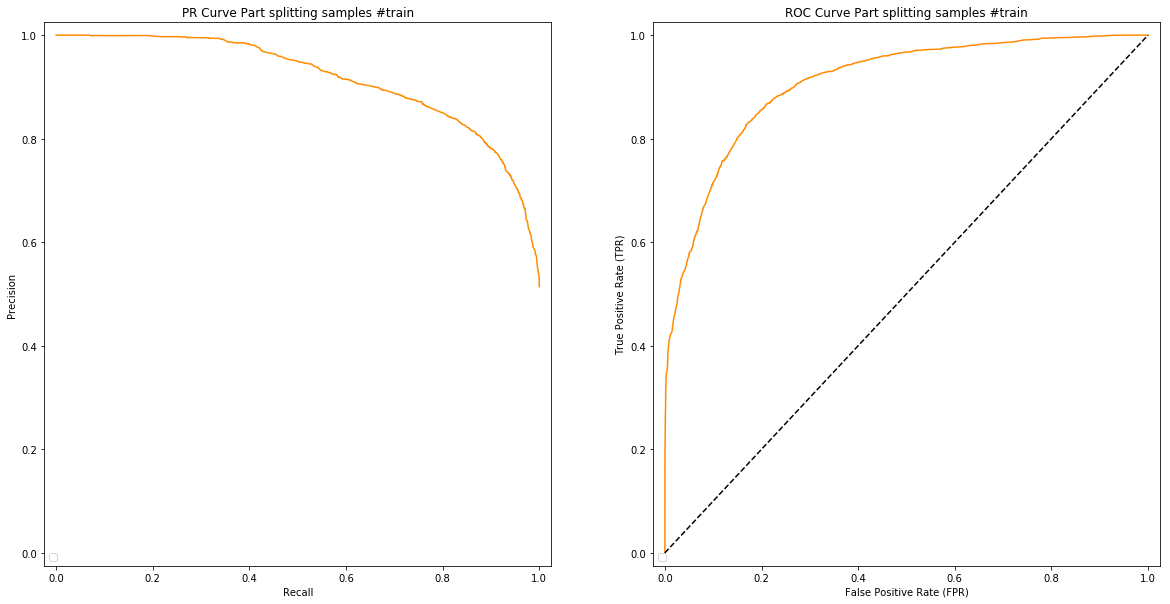

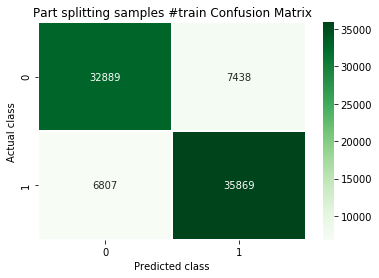



 Classification Report  Part splitting samples #train 


             precision    recall  f1-score   support

          0       0.83      0.82      0.82     40327
          1       0.83      0.84      0.83     42676

avg / total       0.83      0.83      0.83     83003

Accuracy:  0.8283796971193812 



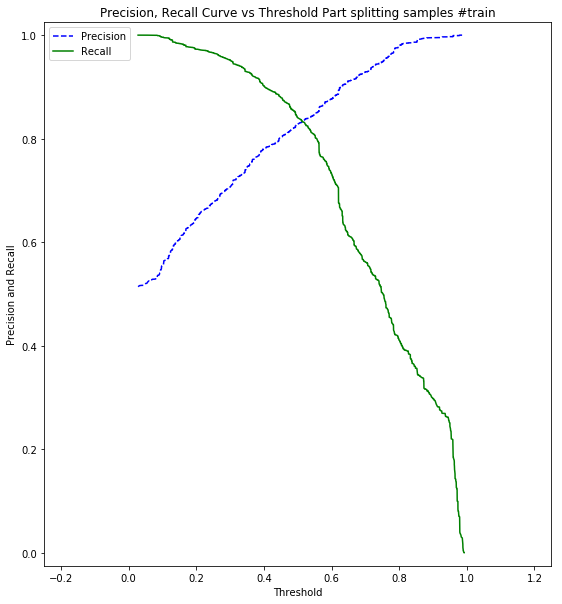

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
No handles with labels found to put in legend.
No handles with labels found to put in legend.


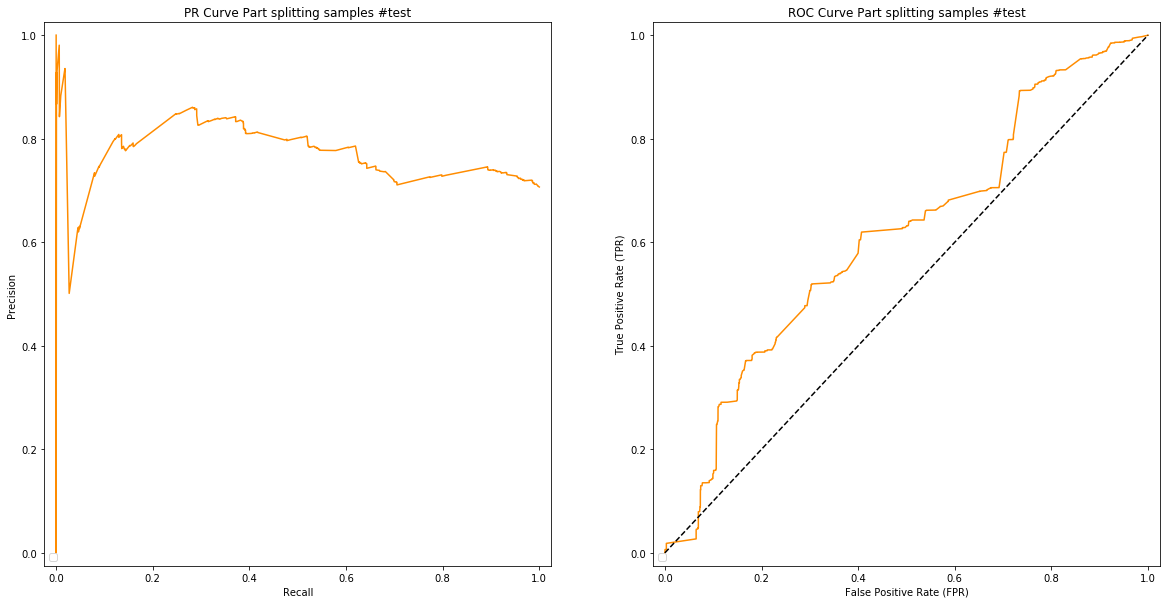

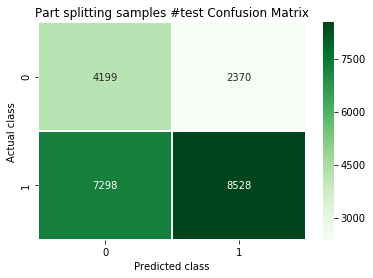



 Classification Report  Part splitting samples #test 


             precision    recall  f1-score   support

          0       0.37      0.64      0.46      6569
          1       0.78      0.54      0.64     15826

avg / total       0.66      0.57      0.59     22395

Accuracy:  0.5682964947532931 



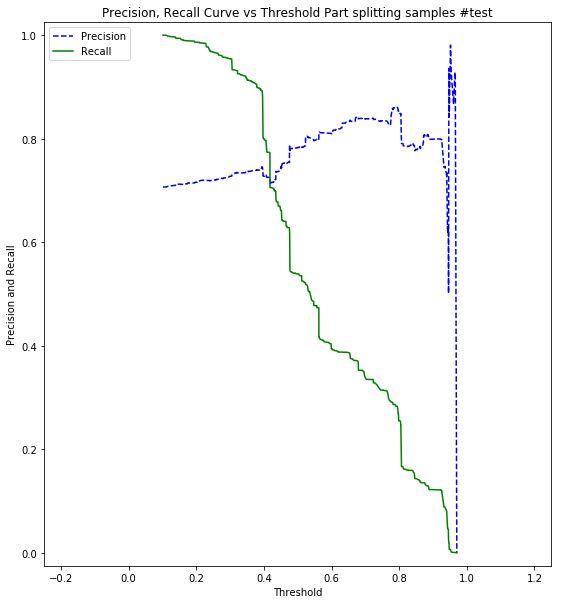

acc train 0.8283796971193812
acc test 0.5682964947532931
44.8797345161438


In [20]:
# fit the model
t0 = time()
fitted = get_fitted_model(X, y, title='Part splitting samples')
print('acc train', fitted['accuracy_train'])
print('acc test', fitted['accuracy_test'])
print(time() - t0)

In [21]:
fitted['model'].feature_importances_

array([0.01837672, 0.00153139, 0.00612557, 0.        , 0.01531394,
       0.02603369, 0.        , 0.00918836, 0.        , 0.01071975,
       0.00612557, 0.00918836, 0.00612557, 0.03828484, 0.00765697,
       0.01990812, 0.01837672, 0.00765697, 0.00765697, 0.02143951,
       0.        , 0.01378254, 0.01684533, 0.00765697, 0.00306279,
       0.00153139, 0.00153139, 0.00306279, 0.01531394, 0.01378254,
       0.00612557, 0.01225115, 0.01225115, 0.01837672, 0.00459418,
       0.00306279, 0.00612557, 0.00153139, 0.01531394, 0.0229709 ,
       0.03062787, 0.00612557, 0.        , 0.00459418, 0.01378254,
       0.00612557, 0.0229709 , 0.00918836, 0.0229709 , 0.01990812,
       0.0229709 , 0.00306279, 0.01071975, 0.01378254, 0.01071975,
       0.00153139, 0.01378254, 0.00459418, 0.01531394, 0.01531394,
       0.01378254, 0.00306279, 0.00306279, 0.02909648, 0.01531394,
       0.01378254, 0.01837672, 0.02143951, 0.        , 0.01684533,
       0.01378254, 0.00306279, 0.00918836, 0.00612557, 0.01837

In [22]:
fitted['model'].feature_importances_.shape

(162,)

In [23]:
fitted['model'].feature_importances_.argmax()

13

## fitted model with feature importance

In [24]:
feat_imp_thres = 0.02
X_feat = X[:, fitted['model'].feature_importances_ > feat_imp_thres]
print(X[1, fitted['model'].feature_importances_ > feat_imp_thres])
print('number of feature=', len(X[1,fitted['model'].feature_importances_ > feat_imp_thres]))

[ 2.00944786  0.52565822 -1.00717594  1.56687741 -0.51108112  0.48569453
  1.10576834  1.35064245 -0.84958677  1.47752322 -1.64785505 -0.7088157 ]
number of feature= 12


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
No handles with labels found to put in legend.
No handles with labels found to put in legend.


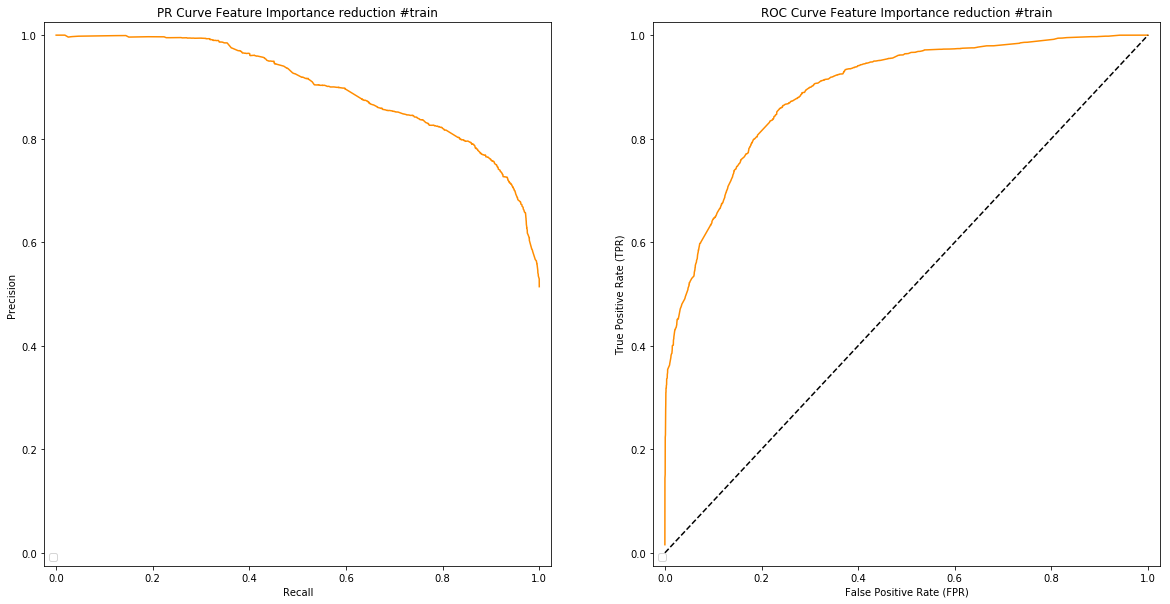

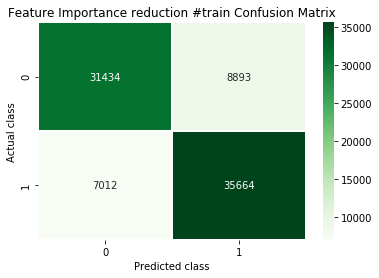



 Classification Report  Feature Importance reduction #train 


             precision    recall  f1-score   support

          0       0.82      0.78      0.80     40327
          1       0.80      0.84      0.82     42676

avg / total       0.81      0.81      0.81     83003

Accuracy:  0.8083804199848198 



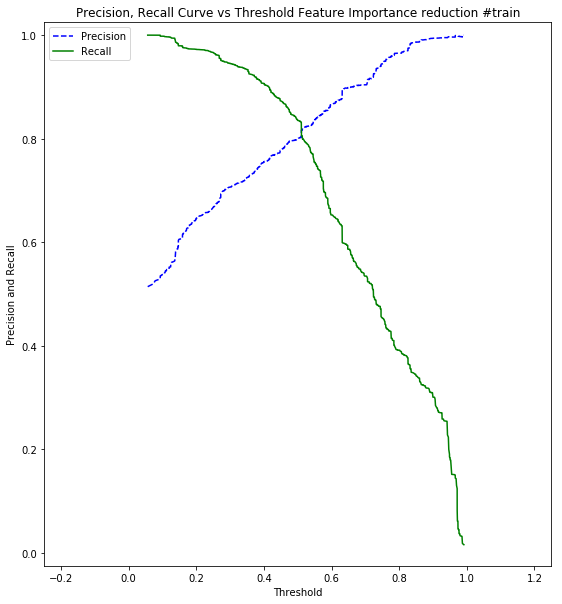

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
No handles with labels found to put in legend.
No handles with labels found to put in legend.


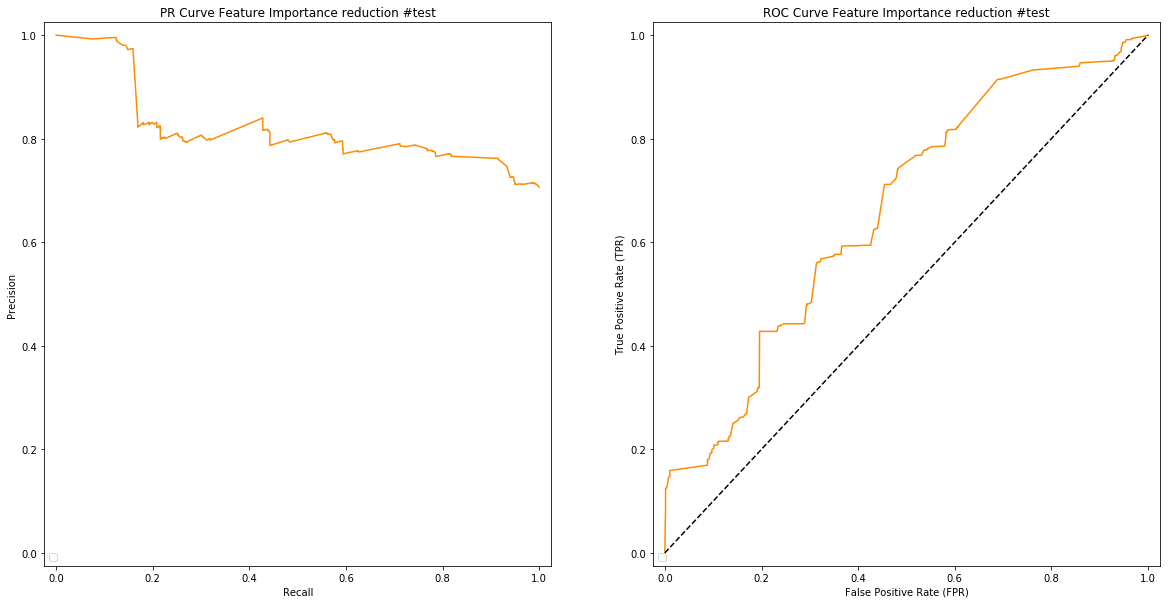

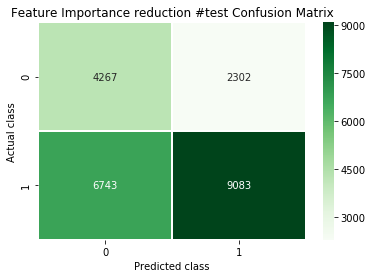



 Classification Report  Feature Importance reduction #test 


             precision    recall  f1-score   support

          0       0.39      0.65      0.49      6569
          1       0.80      0.57      0.67     15826

avg / total       0.68      0.60      0.61     22395

Accuracy:  0.5961152042866711 



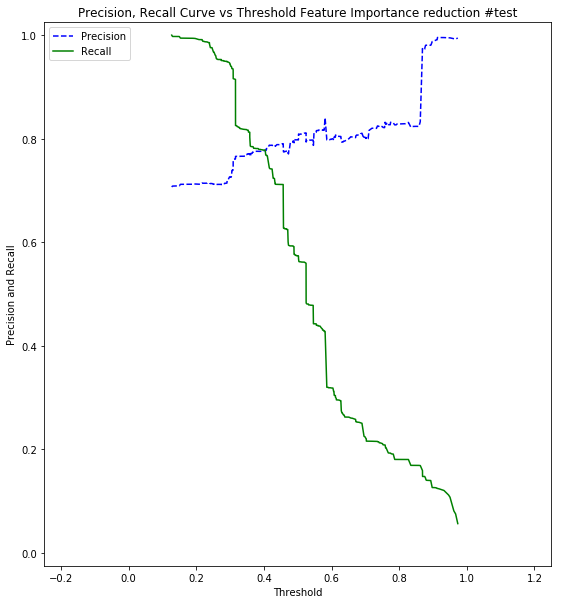

acc train 0.8083804199848198
acc test 0.5961152042866711
6.722965478897095


In [25]:
t0 = time()
fitted_feat = get_fitted_model(X_feat, y, title='Feature Importance reduction')
print('acc train', fitted_feat['accuracy_train'])
print('acc test', fitted_feat['accuracy_test'])
print(time() - t0)

# Random Forest

No handles with labels found to put in legend.
No handles with labels found to put in legend.


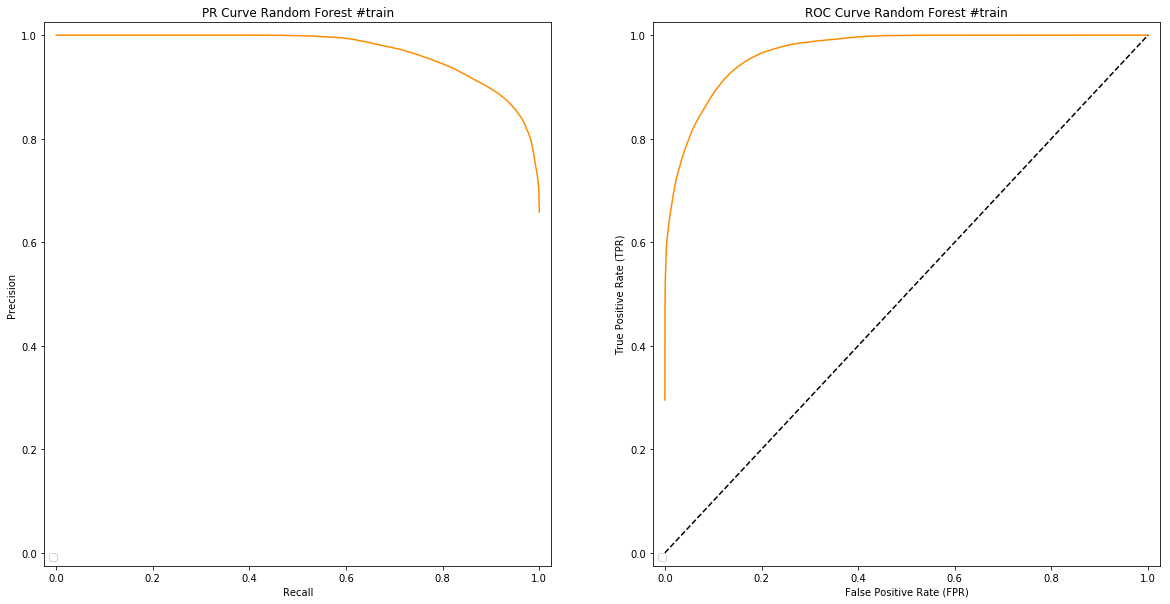

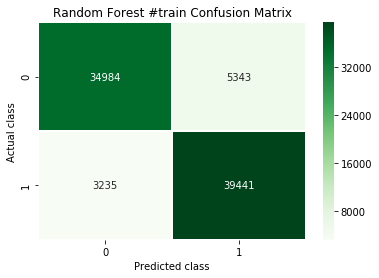



 Classification Report  Random Forest #train 


             precision    recall  f1-score   support

          0       0.92      0.87      0.89     40327
          1       0.88      0.92      0.90     42676

avg / total       0.90      0.90      0.90     83003

Accuracy:  0.8966543377950195 



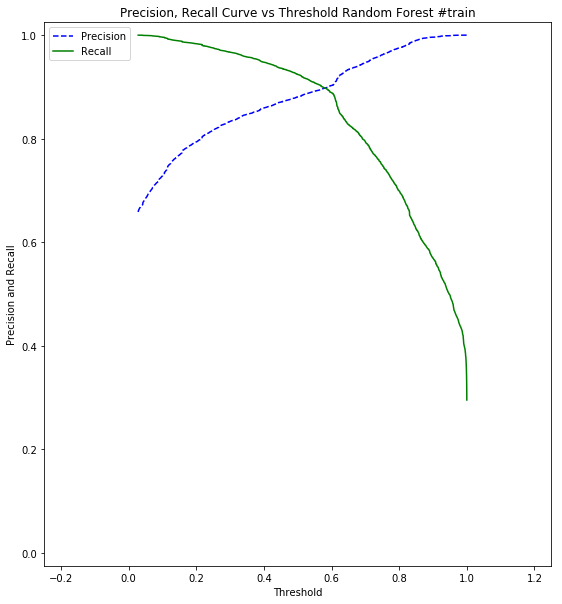

No handles with labels found to put in legend.
No handles with labels found to put in legend.


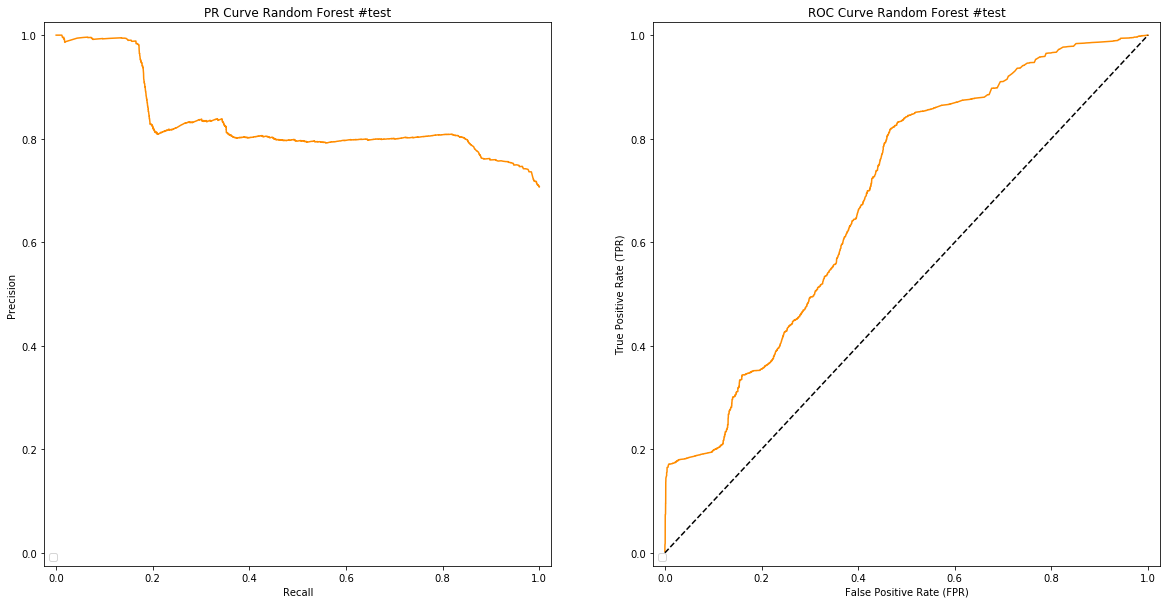

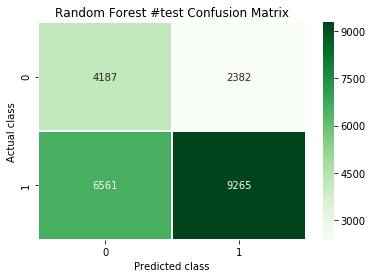



 Classification Report  Random Forest #test 


             precision    recall  f1-score   support

          0       0.39      0.64      0.48      6569
          1       0.80      0.59      0.67     15826

avg / total       0.68      0.60      0.62     22395

Accuracy:  0.600669792364367 



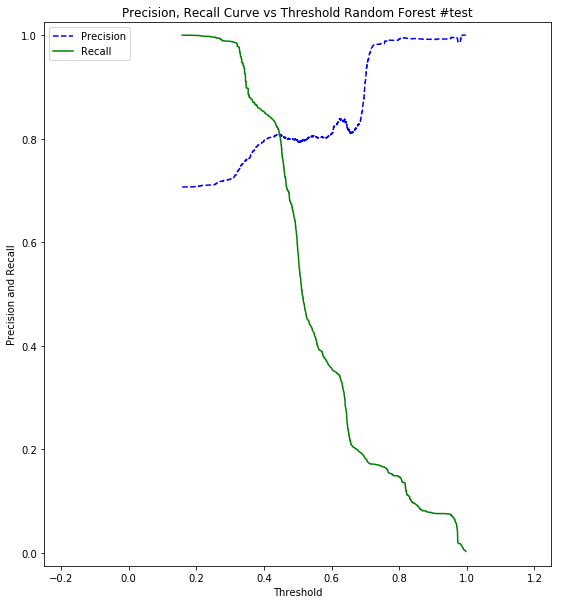

acc train 0.8966543377950195
acc test 0.600669792364367
52.68257021903992


In [26]:
t0 = time()
fitted_rf = get_random_forest_fitted_model(X, y, title='Random Forest')
print('acc train', fitted_rf['accuracy_train'])
print('acc test', fitted_rf['accuracy_test'])
print(time() - t0)

In [27]:
feat_imp_thres = 0.02
X_feat_rf = X[:, fitted_rf['model'].feature_importances_ > feat_imp_thres]
print(X[1, fitted_rf['model'].feature_importances_ > feat_imp_thres])
print('number of feature=', len(X[1,fitted_rf['model'].feature_importances_ > feat_imp_thres]))

[-0.88068892  2.00944786 -1.09804476  1.37365481  1.35064245]
number of feature= 5


No handles with labels found to put in legend.
No handles with labels found to put in legend.


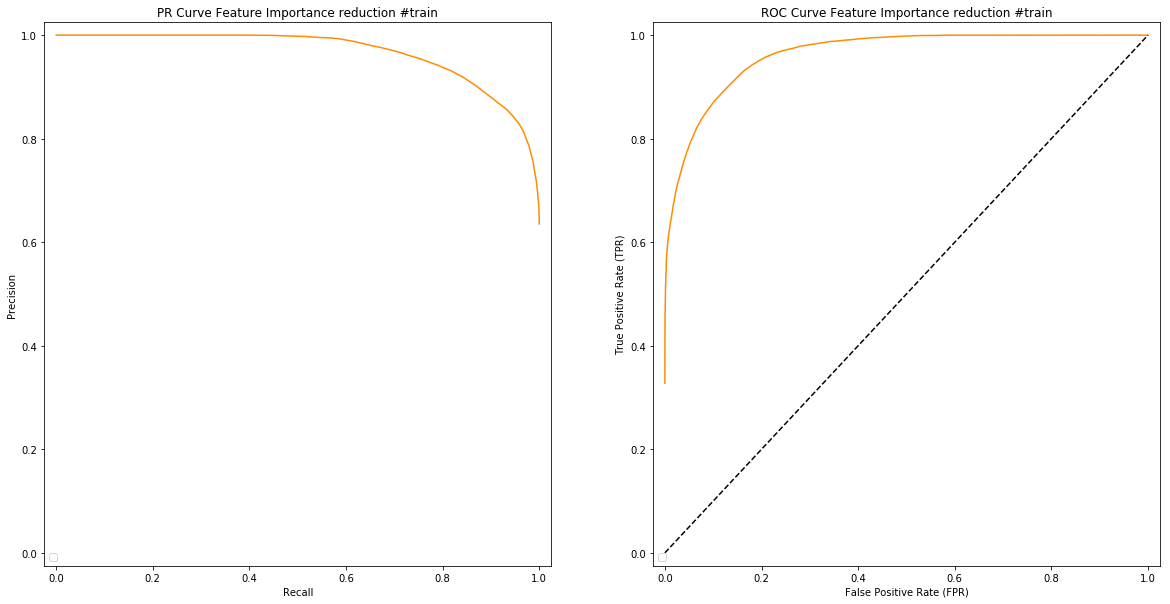

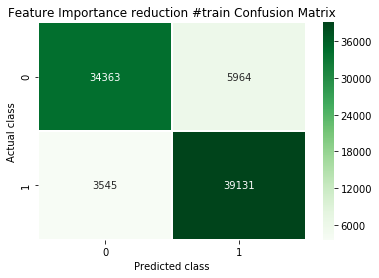



 Classification Report  Feature Importance reduction #train 


             precision    recall  f1-score   support

          0       0.91      0.85      0.88     40327
          1       0.87      0.92      0.89     42676

avg / total       0.89      0.89      0.89     83003

Accuracy:  0.8854378757394311 



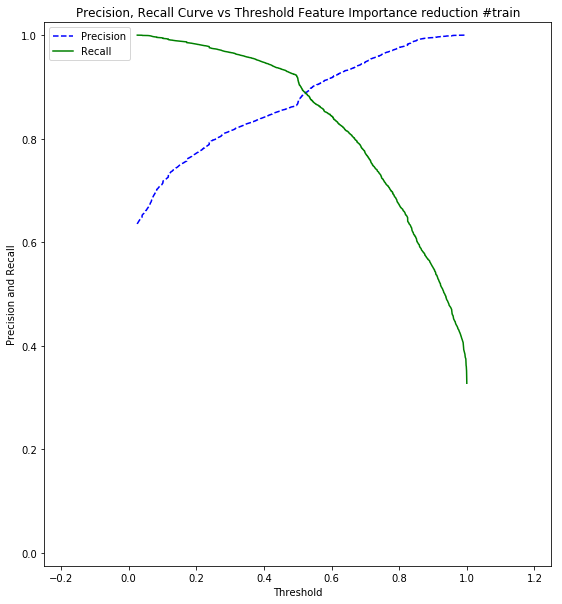

No handles with labels found to put in legend.
No handles with labels found to put in legend.


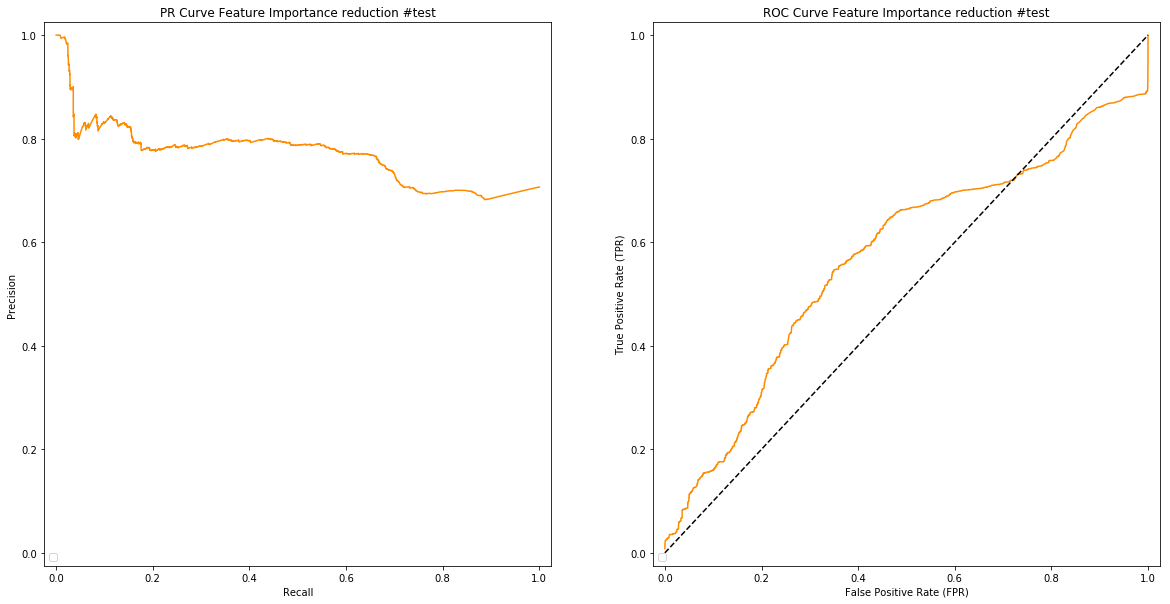

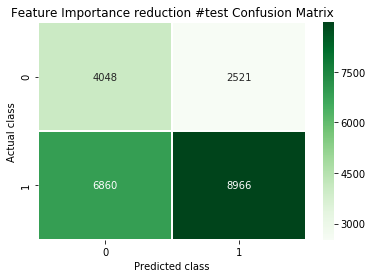



 Classification Report  Feature Importance reduction #test 


             precision    recall  f1-score   support

          0       0.37      0.62      0.46      6569
          1       0.78      0.57      0.66     15826

avg / total       0.66      0.58      0.60     22395

Accuracy:  0.5811118553248493 



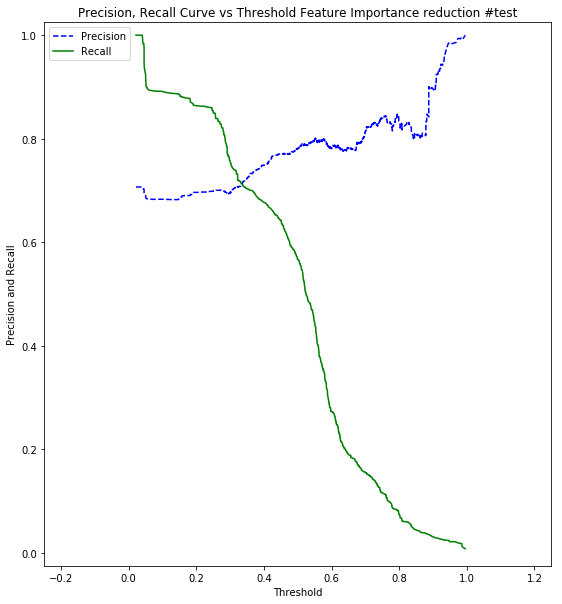

acc train 0.8854378757394311
acc test 0.5811118553248493
23.119124174118042


In [28]:
t0 = time()
fitted_rf_feat = get_random_forest_fitted_model(X_feat_rf, y, title='Feature Importance reduction')
print('acc train', fitted_rf_feat['accuracy_train'])
print('acc test', fitted_rf_feat['accuracy_test'])
print(time() - t0)

# ANN

The ANN is done separately by Anan. Only prediction results is received.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 19)                3097      
_________________________________________________________________
dropout_4 (Dropout)          (None, 19)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 8)                 160       
_________________________________________________________________
dropout_5 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_23 (Dense)             (None, 4)                 36        
_________________________________________________________________
dropout_6 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 5         
Total para

No handles with labels found to put in legend.
No handles with labels found to put in legend.


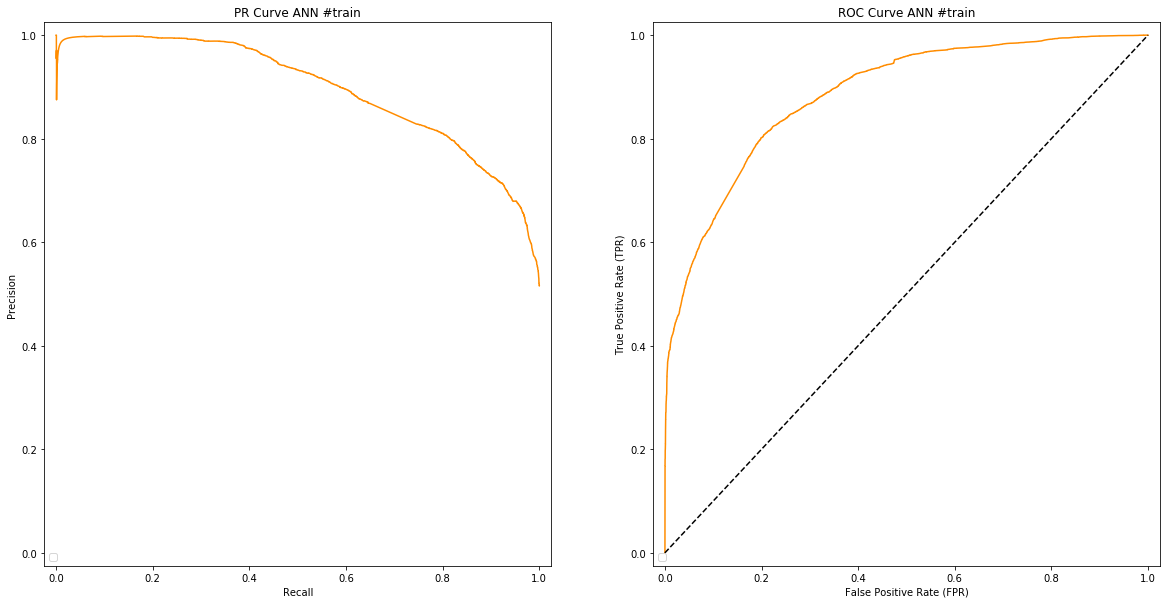

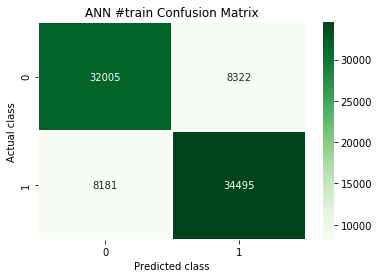



 Classification Report  ANN #train 


             precision    recall  f1-score   support

          0       0.80      0.79      0.80     40327
          1       0.81      0.81      0.81     42676

avg / total       0.80      0.80      0.80     83003

Accuracy:  0.8011758611134537 



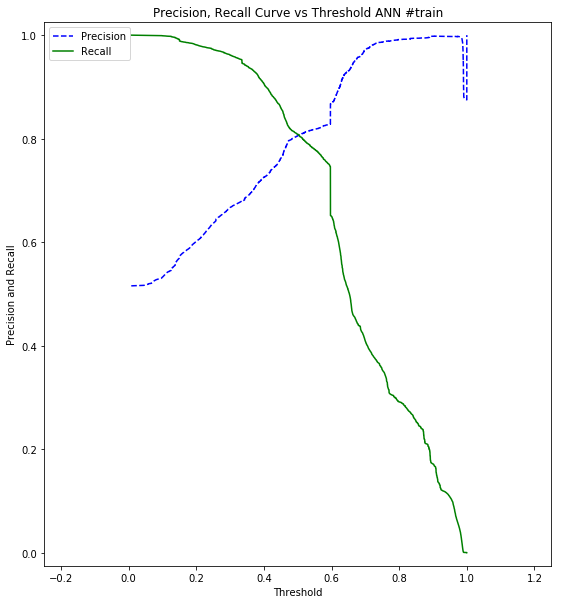

No handles with labels found to put in legend.
No handles with labels found to put in legend.


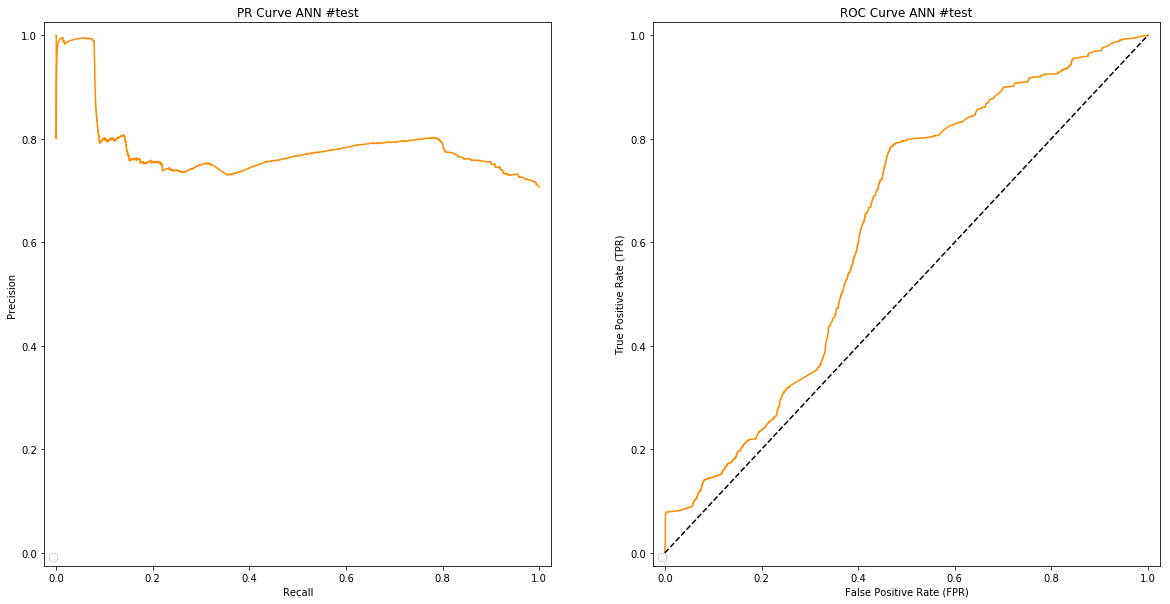

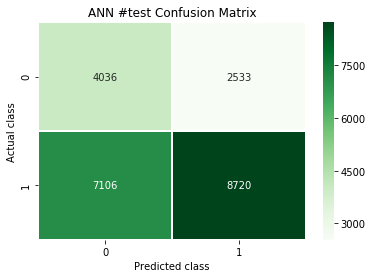



 Classification Report  ANN #test 


             precision    recall  f1-score   support

          0       0.36      0.61      0.46      6569
          1       0.77      0.55      0.64     15826

avg / total       0.65      0.57      0.59     22395

Accuracy:  0.5695914266577361 



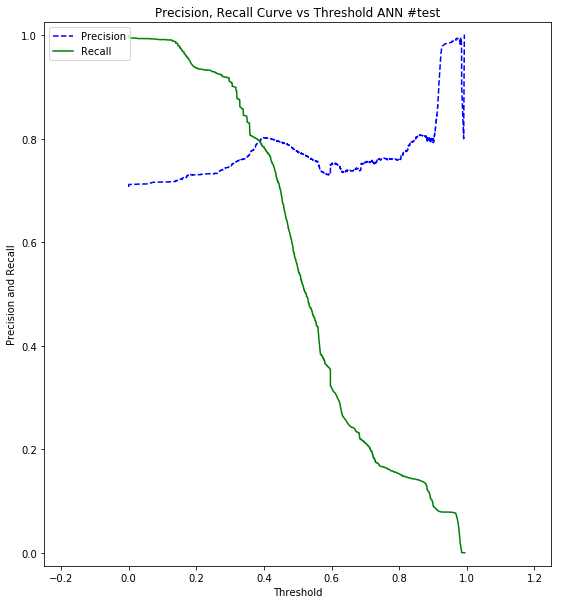

acc train 0.8011758611134537
acc test 0.5695914266577361
24.425235271453857


In [40]:
t0 = time()
fitted_ann = get_ann_fitted_model(X, y, title='ANN')
print('acc train', fitted_ann['accuracy_train'])
print('acc test', fitted_ann['accuracy_test'])
print(time() - t0)

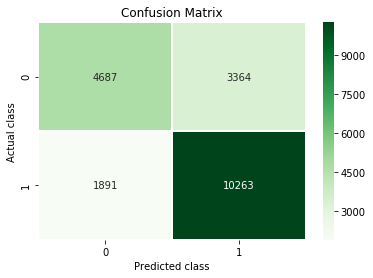



 Classification Report  ANN #test 


             precision    recall  f1-score   support

        0.0       0.71      0.58      0.64      8051
        1.0       0.75      0.84      0.80     12154

avg / total       0.74      0.74      0.73     20205

Accuracy:  0.7399158624102945 



In [48]:
# read prediction results from Anan
log9=np.loadtxt('log-9.txt')
y_pred = np.where(log9[:,0]>0.5, 1, 0)
y_act = log9[:,1]
title="Confusion Matrix"
cmap="Greens"
fig, ax = plt.subplots()
cm = confusion_matrix(y_act, y_pred)
tp = cm[1,1]
tn = cm[0,0]
fp = cm[0,1]
fn = cm[1,0]
cm = np.array([[tn, fp], [fn, tp]])
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, cmap = cmap, ax = ax)
ax.set_title(title)
ax.set_xlabel("Predicted class")
ax.set_ylabel("Actual class")
plt.show()
title='ANN #test'

print("\n\n Classification Report ", title, "\n\n")  
print(classification_report(y_act, y_pred))
accu = metrics.accuracy_score(y_act, y_pred)
print("Accuracy: ", accu, "\n")